# Project Data Science: Bitcoin Price Prediction

## 1. Introduction
In this day AI have a significant impact almost in our life and work place, and for this field we will leveraging ai in sequential data development. In this Data Science Project we will do some research about BTCUSD consolidation price with Deep Learning Neural Network LSTM method using PyTorch library
### 1. 1 Project Objective
The main objective is to predict BTC price until the next months with LSTM (Long Short Term Memory) method
### 1. 2 Dataset Description
`BTC-USD.csv` is the name of the dataset, which was taken from the Kaggle Dataset and has seven columns: `Date, Open,High, Low, Close, Adj Close, Volume`. The data is a compilation of the price of Bitcoin from 2014 until early 2024, which is a changes every minute. 

## 2. Data Preparation


### 2.1 Importing Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import torchmetrics
plt.style.use('ggplot')

### 2.2 Loading the Dataset

In [2]:
df = pd.read_csv('BTC-USD.csv', parse_dates=['Date'])

### 2.3 Initial Data Exploration

In [3]:
# get 5 first data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0


In [4]:
# get data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3413 non-null   datetime64[ns]
 1   Open       3412 non-null   float64       
 2   High       3412 non-null   float64       
 3   Low        3412 non-null   float64       
 4   Close      3412 non-null   float64       
 5   Adj Close  3412 non-null   float64       
 6   Volume     3412 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 186.8 KB


In [5]:
# to know mean, max, min, std, 25%, 50%, 75% of each column
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3413,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3.412000e+03
mean,2019-05-21 00:00:00.000000256,14747.360368,15091.809098,14376.126435,14758.111980,14758.111980,1.663026e+10
min,2014-09-18 00:00:00,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,2017-01-18 00:00:00,921.790009,935.210266,908.876495,921.739258,921.739258,1.685530e+08
50%,2019-05-21 00:00:00,8288.819824,8464.720703,8108.011475,8285.438965,8285.438965,1.176004e+10
75%,2021-09-20 00:00:00,24345.831543,24986.300293,23907.724610,24382.675293,24382.675293,2.697648e+10
max,2024-01-21 00:00:00,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11
std,NaN,16293.633702,16683.948248,15855.901350,16295.374063,16295.374063,1.907607e+10


## 3. Data Cleaning

### 3.1 Handling Missing Values

In [6]:
#find missing valuee
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [7]:
# drop all missing values
df.dropna(inplace=True)
# check again
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### 3.2 Removing Duplicate Values

In [8]:
# check duplicate values without Timestamp column
df.duplicated().sum()


np.int64(0)

## 4. Exploratory Data Analysis (EDA)

### 4.1 Descriptive Statistics

In [9]:
# descriptive statistics
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3412,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3.412000e+03
mean,2019-05-20 12:00:25.322391808,14747.360368,15091.809098,14376.126435,14758.111980,14758.111980,1.663026e+10
min,2014-09-18 00:00:00,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,2017-01-17 18:00:00,921.790009,935.210266,908.876495,921.739258,921.739258,1.685530e+08
50%,2019-05-20 12:00:00,8288.819824,8464.720703,8108.011475,8285.438965,8285.438965,1.176004e+10
75%,2021-09-19 06:00:00,24345.831543,24986.300293,23907.724610,24382.675293,24382.675293,2.697648e+10
max,2024-01-21 00:00:00,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11
std,NaN,16293.633702,16683.948248,15855.901350,16295.374063,16295.374063,1.907607e+10


### 4.2 Correlation Analysis

In [10]:
# check the correlation between columns
df.corr()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.768140,0.765571,0.772179,0.768385,0.768385,0.627426
Open,0.768140,1.000000,0.999497,0.999122,0.998831,0.998831,0.678427
High,0.765571,0.999497,1.000000,0.998970,0.999472,0.999472,0.683762
Low,0.772179,0.999122,0.998970,1.000000,0.999377,0.999377,0.668720
Close,0.768385,0.998831,0.999472,0.999377,1.000000,1.000000,0.677126
Adj Close,0.768385,0.998831,0.999472,0.999377,1.000000,1.000000,0.677126
Volume,0.627426,0.678427,0.683762,0.668720,0.677126,0.677126,1.000000


<Axes: >

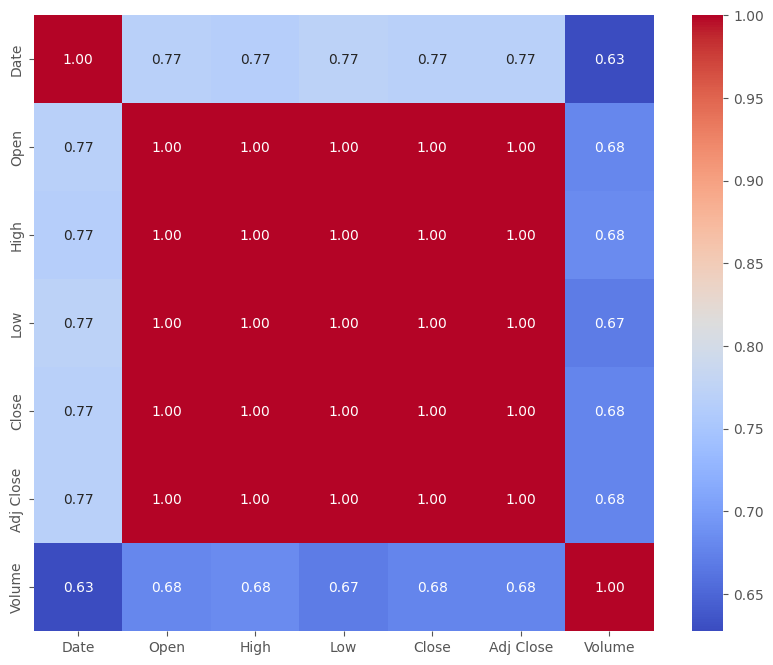

In [11]:
# plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

### 4.3 Data Visualization

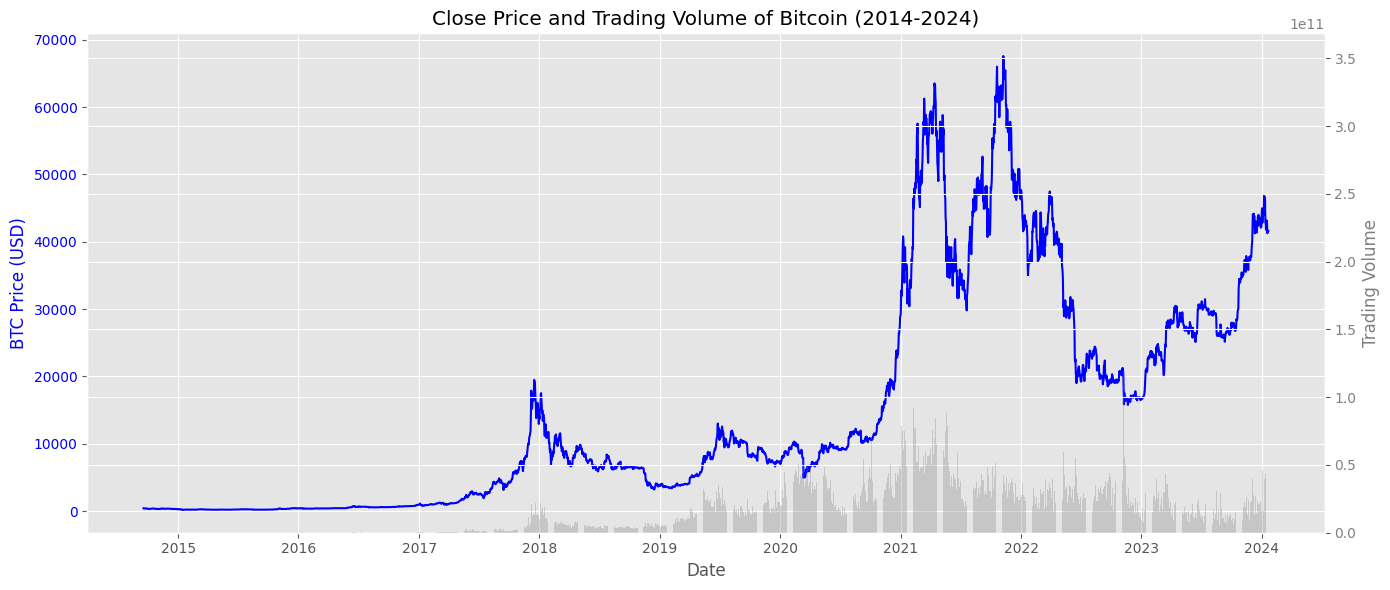

In [12]:
# visualize the closing price over time and volume
# make plot with 2 Y axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Close price in left side
ax1.plot(df['Date'], df['Close'], color='blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# make second Y axis for volume
# Plot Volume in right side
ax2 = ax1.twinx()
ax2.bar(df['Date'], df['Volume'], color='gray', alpha=0.3, label='Volume')
ax2.set_ylabel('Trading Volume', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Tambahkan judul dan legend
plt.title('Close Price and Trading Volume of Bitcoin (2014-2024)')
fig.tight_layout()
plt.show()

### 4.4 Distribution Analysis

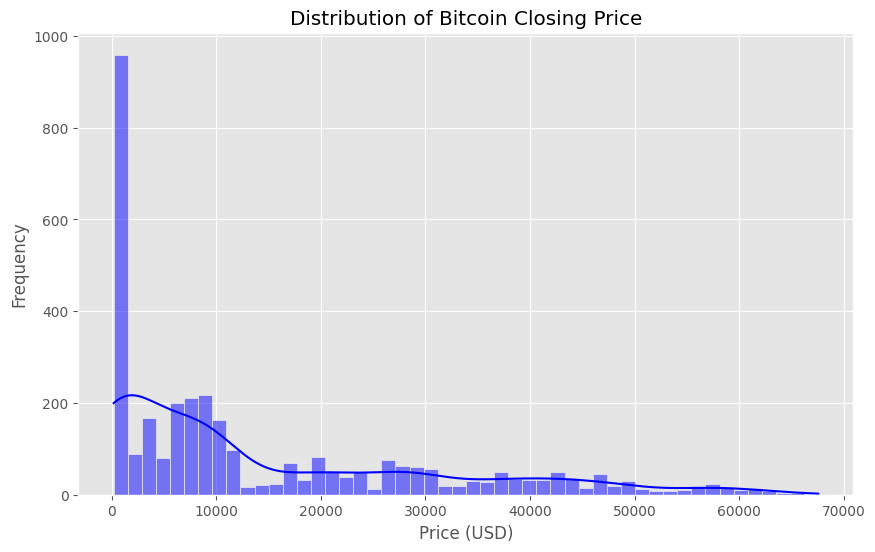

In [13]:
# distibution of the closing price
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True, color='blue')
plt.title('Distribution of Bitcoin Closing Price')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()



## 5. Feature Engineering

In [14]:
# chech CUDA
torch.cuda.is_available()

True

In [38]:
# make function for make sequence data xs and ys
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:(i + seq_length), 4]
        y = data.iloc[i + seq_length, 4]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# make sequence data with 30 days
X, y = create_sequences(df, 30)

# check the shape of X and y
X.shape, y.shape

((3382, 30), (3382,))

In [41]:
# check the first 5 data of X and y
X[:5], y[:5]

(array([[424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987, 411.574005, 404.424988, 399.519989,
         377.181   , 375.46701 , 386.944   , 383.61499 , 375.071991,
         359.511993, 328.865997, 320.51001 , 330.07901 , 336.187012,
         352.940002, 365.026001, 361.562012, 362.299011, 378.549011,
         390.414001, 400.869995, 394.77301 , 382.556   , 383.757996],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005, 404.424988, 399.519989, 377.181   ,
         375.46701 , 386.944   , 383.61499 , 375.071991, 359.511993,
         328.865997, 320.51001 , 330.07901 , 336.187012, 352.940002,
         365.026001, 361.562012, 362.299011, 378.549011, 390.414001,
         400.869995, 394.77301 , 382.556   , 383.757996, 391.441986],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988, 399.519989, 377.181   , 375.46701 ,
         386.944   , 383.61499 ,

In [42]:
# import to tensor dataset
dataset = TensorDataset(
    torch.from_numpy(X).float(),
    torch.from_numpy(y).float()
)
dataset[:5]

(tensor([[424.4400, 394.7960, 408.9040, 398.8210, 402.1520, 435.7910, 423.2050,
          411.5740, 404.4250, 399.5200, 377.1810, 375.4670, 386.9440, 383.6150,
          375.0720, 359.5120, 328.8660, 320.5100, 330.0790, 336.1870, 352.9400,
          365.0260, 361.5620, 362.2990, 378.5490, 390.4140, 400.8700, 394.7730,
          382.5560, 383.7580],
         [394.7960, 408.9040, 398.8210, 402.1520, 435.7910, 423.2050, 411.5740,
          404.4250, 399.5200, 377.1810, 375.4670, 386.9440, 383.6150, 375.0720,
          359.5120, 328.8660, 320.5100, 330.0790, 336.1870, 352.9400, 365.0260,
          361.5620, 362.2990, 378.5490, 390.4140, 400.8700, 394.7730, 382.5560,
          383.7580, 391.4420],
         [408.9040, 398.8210, 402.1520, 435.7910, 423.2050, 411.5740, 404.4250,
          399.5200, 377.1810, 375.4670, 386.9440, 383.6150, 375.0720, 359.5120,
          328.8660, 320.5100, 330.0790, 336.1870, 352.9400, 365.0260, 361.5620,
          362.2990, 378.5490, 390.4140, 400.8700, 394.7730

In [46]:
# divide the dataset into train and test
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size

dataset_train, dataset_test = random_split(dataset, [train_size, test_size])
# check the size of train and test dataset
len(dataset_train), len(dataset_test)

# make dataloader for train and test dataset
train_loader = DataLoader(dataset_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=64, shuffle=False)


2705.6000000000004

## 6. Modelling using LSTM 

In [19]:
# make class for LSTM
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x, num_layers, hidden_size):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size)
        c0 = torch.zeros(num_layers, x.size(0), hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

### 6.1 Model Training Loop

In [52]:
# make LSTM model with input size 1, hidden size 64, and num layers 2
lstm = LSTM(input_size=1, hidden_size=64, num_layers=2)
# use MSE loss function and Adam optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=0.001)

# make training iteration
num_epochs = 100

for epoch in range(num_epochs):
    # for epoch in range(num_epochs):
    for seqs, labels in train_loader:
        # reshape the data
        seqs = seqs.view(seqs.size(0), seqs.size(1), 1)
        # make prediction
        y_pred = lstm(seqs, num_layers=2, hidden_size=64)
        # calculate the loss
        loss = criterion(y_pred, labels.view(-1, 1))
        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

Epoch 1/100, Loss: 436159872.0000
Epoch 1/100, Loss: 664872192.0000
Epoch 1/100, Loss: 433865152.0000
Epoch 1/100, Loss: 350279552.0000
Epoch 1/100, Loss: 428807040.0000
Epoch 1/100, Loss: 360330432.0000
Epoch 1/100, Loss: 563558016.0000
Epoch 1/100, Loss: 385741280.0000
Epoch 1/100, Loss: 400881440.0000
Epoch 1/100, Loss: 515759360.0000
Epoch 1/100, Loss: 451452288.0000
Epoch 1/100, Loss: 511845760.0000
Epoch 1/100, Loss: 378729664.0000
Epoch 1/100, Loss: 228808992.0000
Epoch 1/100, Loss: 480270304.0000
Epoch 1/100, Loss: 611984128.0000
Epoch 1/100, Loss: 697840192.0000
Epoch 1/100, Loss: 731765888.0000
Epoch 1/100, Loss: 410034784.0000
Epoch 1/100, Loss: 639111232.0000
Epoch 1/100, Loss: 507830144.0000
Epoch 1/100, Loss: 489829632.0000
Epoch 1/100, Loss: 388081216.0000
Epoch 1/100, Loss: 581018304.0000
Epoch 1/100, Loss: 546860352.0000
Epoch 1/100, Loss: 323947392.0000
Epoch 1/100, Loss: 432827936.0000
Epoch 1/100, Loss: 515123456.0000
Epoch 1/100, Loss: 426349120.0000
Epoch 1/100, L

### 6.2 Model Evaluation Loop

In [53]:
mse = torchmetrics.MeanSquaredError()

# set the model to evaluation mode
lstm.eval()
# make prediction
with torch.no_grad():
    for seqs, labels in test_loader:
        seqs = seqs.view(seqs.size(0), seqs.size(1), 1)
        y_pred = lstm(seqs, num_layers=2, hidden_size=64)
        mse(y_pred, labels.view(-1, 1))

print(f"Test MSE: {mse.compute()}")


Test MSE: 453580608.0
